# Tutorial 1b: Lagrange dynamics with non-conservative forces
**Aim:** To incorporate non-conservative forces into a dynamic model.

Previously, we simulated a double pendulum swinging freely. Now we're going to add a force acting in the horizontal direction, and a control torque acting at joint 2:
<img src = "pendulum_force2.png" width = "250">

In [23]:
#Code from last time

# import libraries
import sympy as sym
import numpy as np

from IPython.display import display #for pretty printing

# create symbolic variables

# system parameters
X0,Y0 = sym.symbols(['X0','Y0']) # fixed position of first link
g = sym.symbols('g')
m1,m2 = sym.symbols(['m1','m2']) # mass of links
l1,l2 = sym.symbols(['l1','l2']) # length of links
In1,In2 = sym.symbols(['In1','In2']) # moment of intertia of links

# generalized coordinates
th1,th2 = sym.symbols(['theta1','theta2']) #position
dth1,dth2 = sym.symbols(['\dot{\\theta}_{1}','\dot{\\theta}_{2}']) #velocity
ddth1,ddth2 = sym.symbols(['\ddot{\\theta}_{1}','\ddot{\\theta}_{2}']) #acceleration

q = sym.Matrix([[th1],[th2]]) #group into matrices
dq = sym.Matrix([[dth1],[dth2]])
ddq = sym.Matrix([[ddth1],[ddth2]])

# STEP 1: write expressions for the system space coordinates in terms of the generalized coordinates and parameters
th1a = th1 #absolute angle
th2a = th2 + th1 

x1 = X0 + 0.5*l1*sym.sin(th1a)
y1 = Y0 - 0.5*l1*sym.cos(th1a)

x2 = X0 + l1*sym.sin(th1a) + 0.5*l2*sym.sin(th2a)
y2 = Y0 - l1*sym.cos(th1a) - 0.5*l2*sym.cos(th2a)

# STEP 2: generate expressions for the system space velocities
p1 = sym.Matrix([x1,y1,th1])
[dx1,dy1,dth1a] = p1.jacobian(q)*dq

p2 = sym.Matrix([x2,y2,th2a])
[dx2,dy2,dth2a] = p2.jacobian(q)*dq

display(dx2)

# STEP 3: generate expressions for the kinetic and potential energy

T = sym.Matrix([0.5*m1*(dx1**2+dy1**2) + 0.5*m2*(dx2**2+dy2**2) + 0.5*In1*dth1a**2 + 0.5*In2*dth2a**2])
V = sym.Matrix([m1*g*y1 + m2*g*y2])

# STEP 4: calculate each term of the Lagrange equation
# term 1
Lg1 = sym.zeros(1,len(q))
for i in range(len(q)):
    dT_ddq = sym.diff(T,dq[i]) # get partial of T in dq_i
    Lg1[i] = dT_ddq.jacobian(q)*dq + dT_ddq.jacobian(dq)*ddq #...then get time derivative of that partial

# term 3
Lg3 = T.jacobian(q) # partial of T in q

# term 4
Lg4 = V.jacobian(q) # partial of U in q

\dot{\theta}_{1}*(l1*cos(theta1) + 0.5*l2*cos(theta1 + theta2)) + 0.5*\dot{\theta}_{2}*l2*cos(theta1 + theta2)

## Generalized Forces
When no external forces act, the equations of motion are given by the formula:
$$\frac{d}{dt}\left(\frac{\partial T}{\partial \dot{q_i}}\right)
-\frac{d}{dt}\left(\frac{\partial V}{\partial \dot{q_i}}\right)
-\frac{\partial T}{\partial q_i}
+\frac{\partial U}{\partial q_i}=0$$

Non-conservative forces are represented by the *generalized force* vector $Q$, which fits in on the other side of that equation:
$$\frac{d}{dt}\left(\frac{\partial T}{\partial \dot{q_i}}\right)
-\frac{d}{dt}\left(\frac{\partial V}{\partial \dot{q_i}}\right)
-\frac{\partial T}{\partial q_i}
+\frac{\partial U}{\partial q_i}=Q$$

The concept of generalized forces makes sense (sort of) in the context of work. 

We know work is the product of a force and the displacement over which it acts: $W = F\Delta x$

In a normal cartesian coordinate system, this is a straightforward quantity to calculate because the direction the force acts in and the displacement are expressed in easy directions like 'x' or 'y'. But in a generalized coordinate system, your coordinates might have much weirder directions like 'the angle between link 1 and link 2'. 

Still, it's useful to have a thing you can call 'work' that's a product of force and displacement, so in Lagrange mechanics, we use a quantity called *virtual work* that's the product of a generalized force acting in the direction of a coordinate, and the *virtual displacement* in the direction of that coordinate: 
$$\delta W_i = Q_i\delta q_i$$

Where $\delta q_i$ is the virtual displacement.

### How do we calculate it?

The generalized force is just a mapping of forces expressed in world coordinates to one expressed in the generalized coordinates.

To do this mapping, we need two vectors: $F$, the force itslef, and $r$, the position where it acts. Both are R6 (R3 in 2D) vectors, with each element corresponding to a direction (of translation or rotation) in the world frame. 

In a 2D world, you can think of each element of $F$ or $r$ being the part that corresponds to the direction of the unit vectors $[\hat{i},\hat{j},\hat{k}]$, where $\hat{k}$ gives the rotation around the $z$ axis.

The generalized component $Q_{ji}$ of a force $F_j$ in the direction of a coordinate $q_i$ is given by the dot product of $F_j$ with the partial derivative of $r_j$ with respect to $q_i$:
$$Q_{ji} = F_j \cdot \frac{\partial r_j}{\partial q_i}$$

The matrix containing the partial derivatives of $r_i$ with respect to all coordinates in the system is called the *Jacobian* $J$ of $F_j$. You can get the generalized forces for all of $q$ at once by multiplying $J^T F$. In this way, the Jacobian directly maps force vectors expressed in world terms to the generalized coordinates.

### Example 1: horizontal force
The horizontal force expressed in the world frame is:
$$F = \begin{pmatrix} F \\ 0 \\ 0 \end{pmatrix}$$

The position where it acts is the end of the second pendulum. The $x,y,z$ position of this point in the world frame is
$$r = \begin{pmatrix} 
X_0 + l_1 sin(\theta_1) + l_2 sin(\theta_1+\theta_2) \\ 
Y_0 - l_1 cos(\theta_1) - l_2 cos(\theta_1+\theta_2) \\ 
0 \end{pmatrix}$$

The jacobian of this force is 
$$J = \begin{pmatrix}
\frac{\partial r_x}{\partial \theta_1} & \frac{\partial r_x}{\partial \theta_2}\\
\frac{\partial r_y}{\partial \theta_1} & \frac{\partial r_y}{\partial \theta_2}\\
\frac{\partial r_{\theta}}{\partial \theta_1} & \frac{\partial r_{\theta}}{\partial \theta_2}\\
\end{pmatrix}
= \begin{pmatrix}
l_1 cos(\theta_1) + l_2 cos(\theta_1 + \theta_2) & l_2 cos(\theta_1 + \theta_2)\\
l_1 sin(\theta_1) + l_2 sin(\theta_1 + \theta_2) & l_2 sin(\theta_1 + \theta_2)\\
0 \end{pmatrix}$$

The generalized force in both coordinates is given by $J^T F$
$$Q = \begin{pmatrix} F(l_1 cos(\theta_1) + l_2 cos(\theta_1 + \theta_2))\\
F(l_2 cos(\theta_1 + \theta_2)) \end{pmatrix}$$

### Example 2: torque
Force vector:
$$F = \begin{pmatrix} 0 \\ 0 \\ \tau \end{pmatrix}$$

position vector:
$$F = \begin{pmatrix} 0 \\ 0 \\ \theta_2 \end{pmatrix}$$

Jacobian:
$$J = \begin{pmatrix} 0 & 0 \\ 0 & 0 \\ 0 & 1 \end{pmatrix}$$

Generalized force:
$$Q = \begin{pmatrix} 0 \\ \tau \end{pmatrix}$$


In [26]:
# STEP 5: calculate generalized forces
# horizontal force
F = sym.symbols('F')

FF = sym.Matrix([[F],[0],[0]])

rF = sym.Matrix([[X0 + l1*sym.sin(th1) + l2*sym.sin(th1 + th2)],
                 [Y0 - l1*sym.cos(th1) - l2*sym.cos(th1 + th2)],
                 [0]])

JF = rF.jacobian(q)

QF = JF.transpose()*FF

# control torque
tau = sym.symbols('tau')

Ftau = sym.Matrix([[0],[0],[tau]])

rtau = sym.Matrix([[X0 + l1*sym.sin(th1)],
                  [Y0 - l1*sym.cos(th1)],
                  [th2]])

Jtau = rtau.jacobian(q)

Qtau = Jtau.transpose()*Ftau

Qall = QF + Qtau

# put it all together
EOM = Lg1 - Lg3 + Lg4 - Qall.transpose()

## Test
Forward simulate the pendulum from rest in the [0,0] position with A) the force and B) the torque varying according to $5 sin(8\pi t)$.

In [29]:
N = 100

#forces
h = 0.01
t = np.arange(0,N*h,h)

#F_arr = 5*np.sin(8*np.pi*t) #option A
#tau_arr = np.zeros(np.shape(t))

Tau_arr = 5*np.sin(8*np.pi*t) #option B
F_arr = np.zeros(np.shape(t))

#initial conditions
th10 = 0
th20 = 0
dth10 = 0
dth20 = 0

#parameters
X0val = 0
Y0val = 2
l1val = 1
l2val = 1

parameter_values = [(X0,X0val),(Y0,Y0val),(g,9.81),(m1,1),(m2,1),(l1,l1val),(l2,l2val),(In1,0.08),(In2,0.08)]

th1ar = [th10]
th2ar = [th20]
dth1ar = [dth10]
dth2ar = [dth20]

for i in range(1,N):
    # substitute parameter values and previous conditions into the EOM 
    past = [(th1,th1ar[i-1]),(th2,th2ar[i-1]),(dth1,dth1ar[i-1]),(dth2,dth2ar[i-1])]
    forces = [(F,F_arr[i-1]),(tau,tau_arr[i-1])]
    EOM_sub = EOM.subs(parameter_values).subs(past).subs(forces)
    
    # solve for the acceleration
    acc = sym.solve(EOM_sub,[ddth1, ddth2])
    
    # integrate for the next velocity and position    
    dth1ar.append(float(dth1ar[i-1]+h*acc[ddth1]))
    dth2ar.append(float(dth2ar[i-1]+h*acc[ddth2]))
    th1ar.append(float(th1ar[i-1]+h*dth1ar[i]))
    th2ar.append(float(th2ar[i-1]+h*dth2ar[i]))

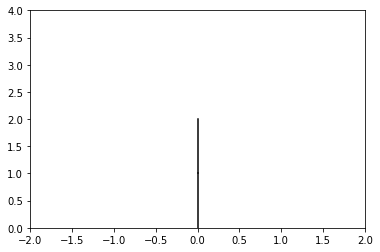

In [28]:
#animate it
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

fig1, ax1 = plt.subplots(1,1) #create axes

def plot_pendulum(i,th1_in,th2_in,ax): #update function for animation
    ax.clear()
    ax.set_xlim([-2,2])
    ax.set_ylim([0,4])
    
    #plot link 1
    L1topx = X0val
    L1topy = Y0val
    L1bottomx = X0val + l1val*np.sin(th1_in[i])
    L1bottomy = Y0val - l1val*np.cos(th1_in[i])
    ax.plot([L1topx,L1bottomx],[L1topy,L1bottomy],color='xkcd:black')
    
    #plot link 2
    L2bottomx = L1bottomx + l2val*np.sin(th1_in[i] + th2_in[i])
    L2bottomy = L1bottomy - l2val*np.cos(th1_in[i] + th2_in[i]) 
    ax.plot([L1bottomx,L2bottomx],[L1bottomy,L2bottomy],color='xkcd:black')
    
update = lambda i: plot_pendulum(i,th1ar,th2ar,ax1) #lambdify update function

animate = ani.FuncAnimation(fig1,update,range(N),interval = 50,repeat=True)

HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook

## Which forces are modelled how?
We sometimes refer to the forces we model with $Q$ as 'external' forces, but this can be confusing since it seems to imply that these are forces acting on the system from the outside. If you were modelling the damping force acting on a joint, that is an 'internal' force in the sense that it is coming from within the system, but it should be incorporated as a generalized force.

Specifically, generalized forces should include all *non-conservative* forces - i.e. anything that changes the total energy in the system. (Damping forces reduce the energy, therfore they are included.)

Spring forces are conservative, however, and should therefore be included as part of the potential energy expression.